In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from transformers import BertTokenizer, BertModel
from imblearn.over_sampling import SMOTE
import tqdm
import torch
import numpy as np
import random


In [2]:
df = pd.read_csv("qwe.csv")
X_train, X_test, Y_train, Y_test = train_test_split(df.brave_new_textpunc_stopwords, df['tag'],random_state=1)
X_train = np.load('A.npy')
X_test = np.load('B.npy')

In [3]:
X_train_resampled, Y_train_resampled = SMOTE().fit_resample(X_train, Y_train)
X_test_resampled, Y_test_resampled = SMOTE().fit_resample(X_test, Y_test)

In [4]:
trainy = Y_train_resampled.map({"IT-компании  ": 0, "Разработка веб-сайтов * ": 1,
                        "Компьютерное железо  ": 2, "Настройка Linux * ": 3,
                        "Гаджеты  ": 4,  "Информационная безопасность * ": 5,
                        "Социальные сети и сообщества  ": 6})
testy = Y_test_resampled.map({"IT-компании  ": 0, "Разработка веб-сайтов * ": 1,
                        "Компьютерное железо  ": 2, "Настройка Linux * ": 3,
                        "Гаджеты  ": 4,  "Информационная безопасность * ": 5,
                        "Социальные сети и сообщества  ": 6})
s = pd.Series(testy)
one_hot_y_test = pd.get_dummies(s)
m = pd.Series(trainy)
one_hot_y_train = pd.get_dummies(m)

In [69]:

num_classes=7
i  = tf.keras.Input(shape=(768,),dtype=tf.float32, name="input_word_ids")
x = tf.keras.layers.Dropout(0.142, name="dropout")(i)
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)
model = tf.keras.Model(inputs = i, outputs = x)
n_epochs = 25
METRICS = [tf.keras.metrics.CategoricalAccuracy(name="accuracy")]
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])

train_x = np.asarray(X_train_resampled)
test_x=np.asarray(X_test_resampled)

for epoch in range(n_epochs):
    model.fit(train_x, 
                      one_hot_y_train, 
                      epochs = 1,
                      validation_data = (test_x, one_hot_y_test),
                      callbacks = [earlystop_callback])
    save_name = 'keras_model_%sepochs.h5' % str(epoch)
    model.save(save_name)

645/704 [==========================>...] - ETA: 0s - loss: 0.8850 - accuracy: 0.6923

KeyboardInterrupt: 

In [43]:
y_pred = model.predict(np.array(X_test_resampled))


In [47]:
accuracy_score(np.argmax(newytest,axis=1),np.argmax(y_pred,axis=1))

0.7061370002546473

Epoch 1/20
704/704 [==============================] - 1s 1ms/step - loss: 1.3174 - categorical_accuracy: 0.5265 - val_loss: 1.1147 - val_categorical_accuracy: 0.6028
Epoch 2/20
704/704 [==============================] - 1s 1ms/step - loss: 1.0227 - categorical_accuracy: 0.6422 - val_loss: 0.9933 - val_categorical_accuracy: 0.6488
Epoch 3/20
704/704 [==============================] - 1s 1ms/step - loss: 0.9490 - categorical_accuracy: 0.6694 - val_loss: 0.9473 - val_categorical_accuracy: 0.6691
Epoch 4/20
704/704 [==============================] - 1s 1ms/step - loss: 0.9068 - categorical_accuracy: 0.6838 - val_loss: 0.9462 - val_categorical_accuracy: 0.6663
Epoch 5/20
704/704 [==============================] - 1s 1ms/step - loss: 0.8829 - categorical_accuracy: 0.6931 - val_loss: 0.9166 - val_categorical_accuracy: 0.6705
Epoch 6/20
704/704 [==============================] - 1s 1ms/step - loss: 0.8677 - categorical_accuracy: 0.6951 - val_loss: 0.8900 - val_categorical_accuracy: 0.6874
Epoc

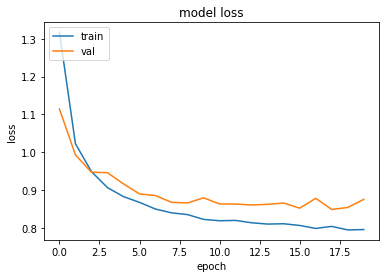

In [79]:
import keras
from matplotlib import pyplot as plt
num_classes=7
i  = tf.keras.Input(shape=(768,),dtype=tf.float32, name="input_word_ids")
x = tf.keras.layers.Dropout(0.142, name="dropout")(i)
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)
model = tf.keras.Model(inputs = i, outputs = x)
n_epochs = 25

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = ['categorical_accuracy'])

history = model.fit(train_x, 
                      one_hot_y_train, 
                      epochs = 20,
                      validation_data = (test_x, one_hot_y_test))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

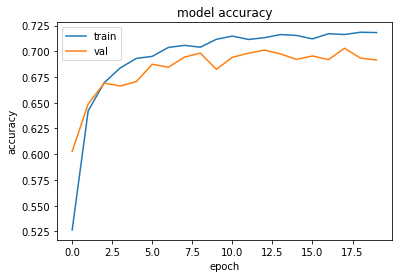

In [80]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [81]:
def plot_val_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

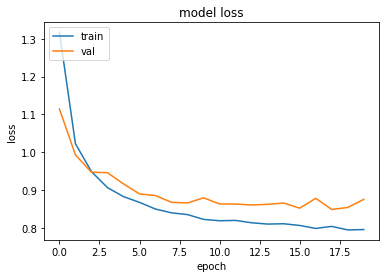

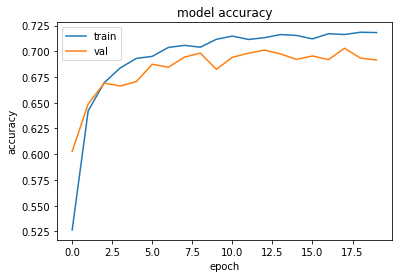

In [82]:
plot_val_loss(history)

In [60]:

print(classification_report(np.argmax(np.asarray(one_hot_y_test), axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      1122
           1       0.65      0.77      0.70      1122
           2       0.73      0.61      0.66      1122
           3       0.82      0.71      0.76      1122
           4       0.68      0.77      0.72      1122
           5       0.79      0.69      0.73      1122
           6       0.71      0.76      0.74      1122

    accuracy                           0.70      7854
   macro avg       0.71      0.70      0.70      7854
weighted avg       0.71      0.70      0.70      7854



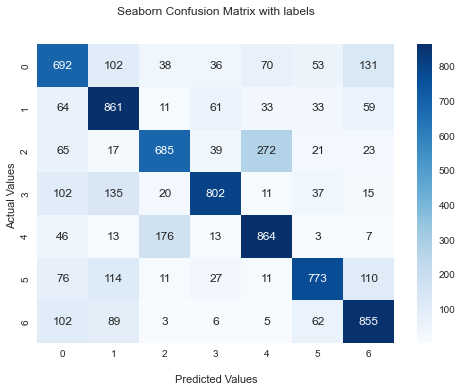

In [58]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(np.asarray(one_hot_y_test), axis=1), np.argmax(y_pred, axis=1))
ax = sns.heatmap(cf_matrix.astype(int), cmap='Blues',annot=True,fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [84]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
clf = SVC()  #probability=True
clf.fit(X_train_resampled, Y_train_resampled)
y_pred = clf.predict(np.array(X_test_resampled))
# y_pred_proba = clf.predict_proba(np.array(X_test_resampled))
print(classification_report(Y_test_resampled, y_pred))

                                precision    recall  f1-score   support

                 IT-компании         0.61      0.54      0.57      1122
                     Гаджеты         0.73      0.60      0.66      1122
Информационная безопасность *        0.69      0.71      0.70      1122
         Компьютерное железо         0.62      0.69      0.65      1122
            Настройка Linux *        0.73      0.75      0.74      1122
      Разработка веб-сайтов *        0.65      0.71      0.68      1122
Социальные сети и сообщества         0.67      0.70      0.69      1122

                      accuracy                           0.67      7854
                     macro avg       0.67      0.67      0.67      7854
                  weighted avg       0.67      0.67      0.67      7854



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_resampled, Y_train_resampled)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.196 total time= 4.3min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.309 total time= 7.1min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.282 total time= 8.7min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.165 total time= 9.0min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.180 total time=10.8min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.521 total time= 7.7min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.560 total time= 5.7min


In [ ]:
print(grid.best_params_)

In [86]:
accuracy_score(Y_test_resampled,y_pred)

0.6707410236822001

In [10]:
y_pred_proba[0]

array([0.19091281, 0.59225583, 0.01363724, 0.06590488, 0.12807085,
       0.00823971, 0.00097867])

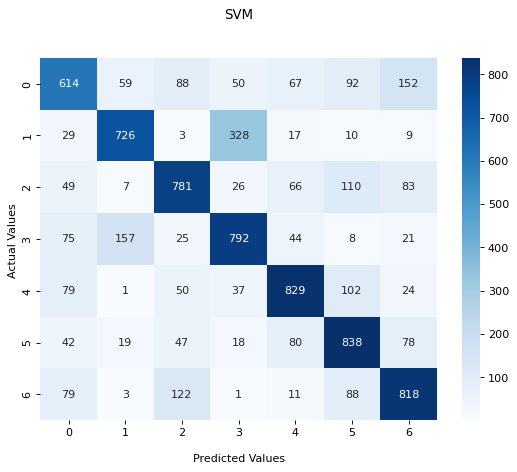

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
cf_matrix = confusion_matrix(Y_test_resampled, y_pred)
ax = sns.heatmap(cf_matrix.astype(int), cmap='Blues',annot=True,fmt='g')
ax.set_title('SVM\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [7]:
s = pd.Series(Y_test_resampled)
new_one_hot_y_test = pd.get_dummies(s)
s = pd.Series(y_pred)
new_one_hot_y_pred = pd.get_dummies(s)

ValueError: Data must be 1-dimensional

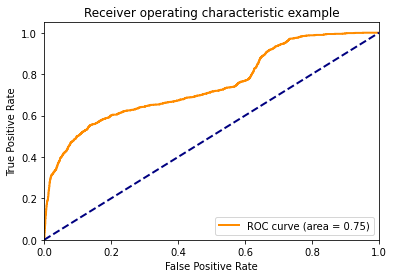

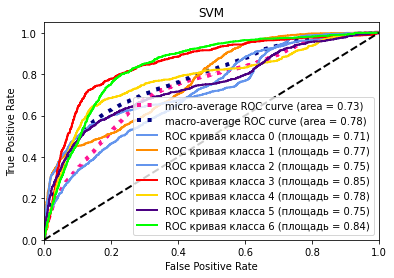

In [96]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
# s = pd.Series(Y_test_resampled)
# new_one_hot_y_test = pd.get_dummies(s)
# s = pd.Series(y_pred)
# new_one_hot_y_pred = pd.get_dummies(s)
products_list = new_one_hot_y_test.values.tolist()
newytest = np.asarray(products_list)
# products_list = new_one_hot_y_pred.values.tolist()
# newypred = np.asarray(products_list)
newypred = predictions_NB
lw = 2
n_classes=7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(newytest[:, i], newypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(newytest.ravel(), newypred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["cornflowerblue", "darkorange", "cornflowerblue","red","gold","indigo","lime","blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC кривая класса {0} (площадь = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.legend(loc="lower right")
plt.show()

In [6]:
from sklearn.metrics import roc_auc_score
y_preb_probs = clf.predict_proba(X_test_resampled)

roc_auc_score(Y_test_resampled, y_preb_probs, average="weighted", multi_class="ovr")

0.934114962897599

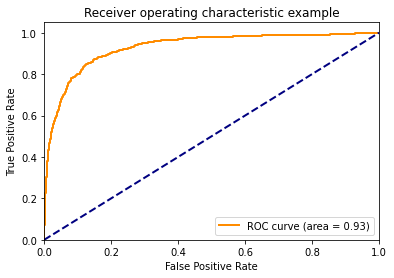

In [24]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
products_list = one_hot_y_test.values.tolist()
newytest = np.asarray(products_list)
lw = 2
n_classes=7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(newytest[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(newytest.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


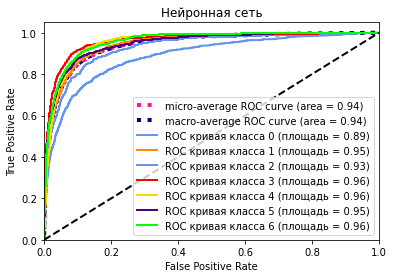

In [30]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["cornflowerblue", "darkorange", "cornflowerblue","red","gold","indigo","lime","blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC кривая класса {0} (площадь = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Нейронная сеть")
plt.legend(loc="lower right")
plt.show()

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=110)
clf.fit(X_train_resampled, Y_train_resampled)
y_pred = clf.predict(np.array(X_test_resampled))

# print(classification_report(Y_test_resampled, y_pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [90]:
y_pred = clf.predict_proba(np.array(X_test_resampled))

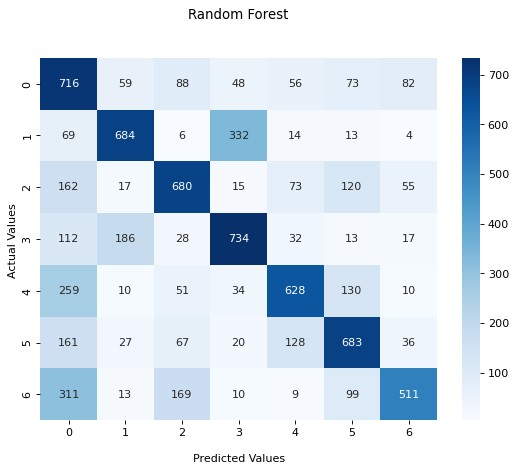

In [66]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
cf_matrix = confusion_matrix(Y_test_resampled, y_pred)
ax = sns.heatmap(cf_matrix.astype(int), cmap='Blues',annot=True,fmt='g')
ax.set_title('Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()

In [92]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
s = pd.Series(Y_test_resampled)
new_one_hot_y_test = pd.get_dummies(s)
s = pd.Series(y_pred)
new_one_hot_y_pred = pd.get_dummies(s)
products_list = new_one_hot_y_test.values.tolist()
newytest = np.asarray(products_list)
products_list = new_one_hot_y_pred.values.tolist()
# newypred = np.asarray(products_list)
newypred = y_pred_proba
lw = 2
n_classes=7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(newytest[:, i], newypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(newytest.ravel(), newypred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["cornflowerblue", "darkorange", "cornflowerblue","red","gold","indigo","lime","blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC кривая класса {0} (площадь = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest")
plt.legend(loc="lower right")
plt.show()


ValueError: Data must be 1-dimensional

In [95]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import class_weight
from sklearn.preprocessing import *

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test_resampled)

sample = class_weight.compute_sample_weight('balanced', Y_train_resampled)

naive = MultinomialNB()
naive.fit(X_train,Y_train_resampled)
predictions_NB = naive.predict_proba(X_test)
# print(classification_report(Y_test_resampled, y_pred))

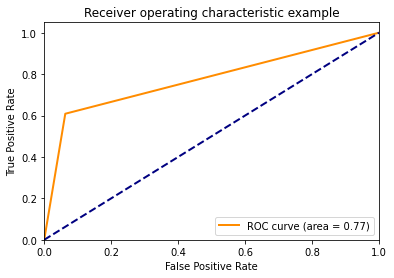

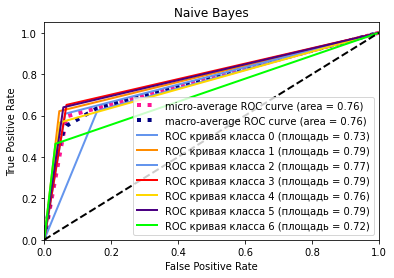

In [59]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
s = pd.Series(Y_test_resampled)
new_one_hot_y_test = pd.get_dummies(s)
s = pd.Series(y_pred)
new_one_hot_y_pred = pd.get_dummies(s)
products_list = new_one_hot_y_test.values.tolist()
newytest = np.asarray(products_list)
products_list = new_one_hot_y_pred.values.tolist()
newypred = np.asarray(products_list)
lw = 2
n_classes=7
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(newytest[:, i], newypred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(newytest.ravel(), newypred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["cornflowerblue", "darkorange", "cornflowerblue","red","gold","indigo","lime","blue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC кривая класса {0} (площадь = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes")
plt.legend(loc="lower right")
plt.show()

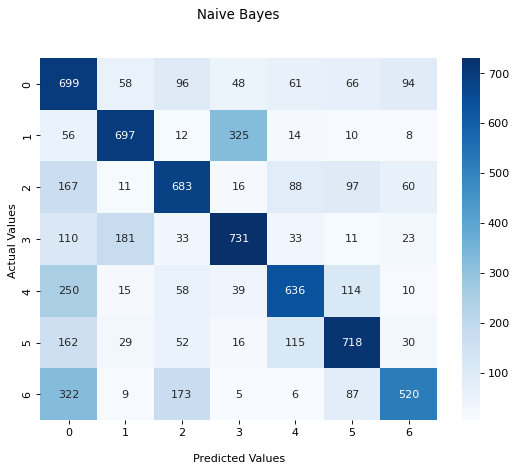

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
cf_matrix = confusion_matrix(Y_test_resampled, y_pred)
ax = sns.heatmap(cf_matrix.astype(int), cmap='Blues',annot=True,fmt='g')
ax.set_title('Naive Bayes\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
plt.show()